In [2]:
!pip install -q scikit-learn matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# Upload Dataset

print("\n=== STEP 1: Upload Dataset ===")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]




=== STEP 1: Upload Dataset ===


Saving diabetes.csv to diabetes (1).csv


In [3]:
#  Step 2: Data Preprocessing
# =======================
print("\n=== STEP 2: Data Preprocessing ===")
df = pd.read_csv(file_name)
print(f"\nLoaded {len(df)} rows and {df.shape[1]} columns")
print("\nFirst few rows of the dataset:")
print(df.head())

# Check for null values
print("\nChecking for missing values:")
print(df.isnull().sum())


=== STEP 2: Data Preprocessing ===

Loaded 768 rows and 9 columns

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Checking for missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                     


=== STEP 3: Exploratory Data Analysis ===


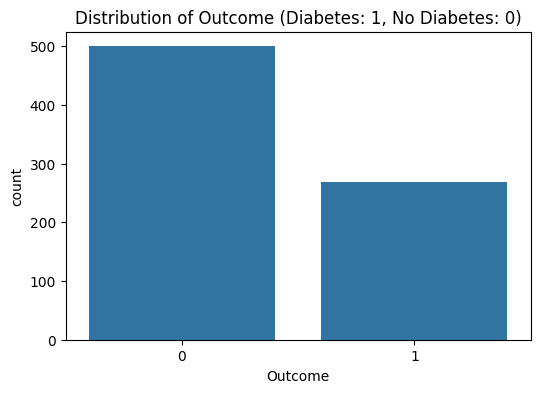

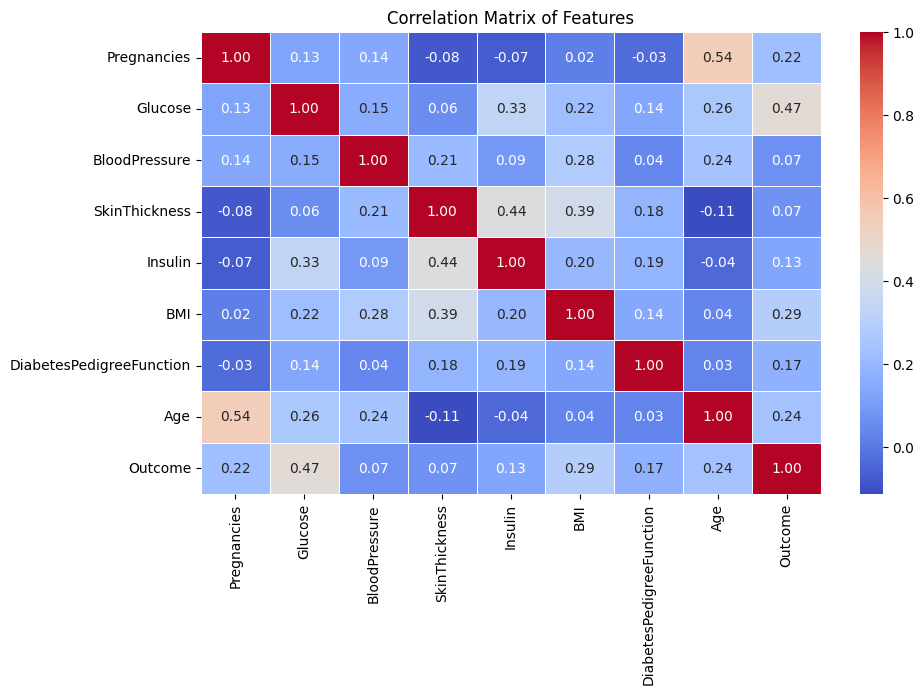

In [4]:
# Step 3: Exploratory Data Analysis (EDA)
# =======================
print("\n=== STEP 3: Exploratory Data Analysis ===")
# Visualize the distribution of the target variable (Outcome)
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome (Diabetes: 1, No Diabetes: 0)')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [6]:
# Step 4: Feature Selection & Scaling
print("\n=== STEP 4: Feature Selection & Scaling ===")
# Features and Target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



=== STEP 4: Feature Selection & Scaling ===


In [8]:
# Step 5: Train Models

print("\n=== STEP 5: Train Models ===")

# Model 1: Gradient Boosting
print("\nTraining Gradient Boosting Classifier...")
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Model 2: Support Vector Machine
print("\nTraining Support Vector Machine Classifier...")
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)



=== STEP 5: Train Models ===

Training Gradient Boosting Classifier...

Training Support Vector Machine Classifier...


SVC(probability=True, random_state=42)


=== STEP 6: Model Evaluation ===

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154


ROC-AUC Score for Gradient Boosting: 0.8096
ROC-AUC Score for SVM: 0.8051


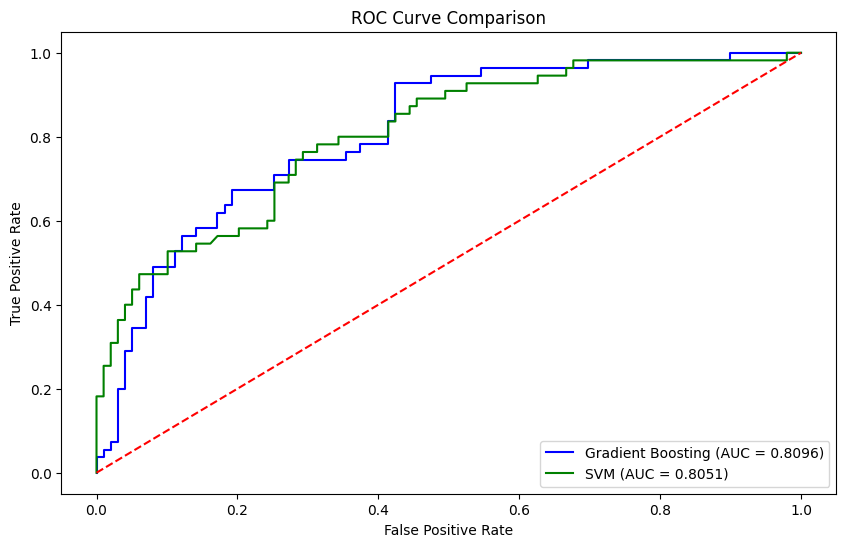

In [9]:
# Step 6: Model Evaluation
print("\n=== STEP 6: Model Evaluation ===")
# Evaluate Gradient Boosting Model
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate SVM Model
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Print classification reports
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# ROC-AUC Score
roc_auc_gb = roc_auc_score(y_test, y_pred_prob_gb)
roc_auc_svm = roc_auc_score(y_test, y_pred_prob_svm)
print(f"\nROC-AUC Score for Gradient Boosting: {roc_auc_gb:.4f}")
print(f"ROC-AUC Score for SVM: {roc_auc_svm:.4f}")

# ROC Curves
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_prob_gb)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', label=f'Gradient Boosting (AUC = {roc_auc_gb:.4f})')
plt.plot(fpr_svm, tpr_svm, color='green', label=f'SVM (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


=== STEP 7: Insights ===


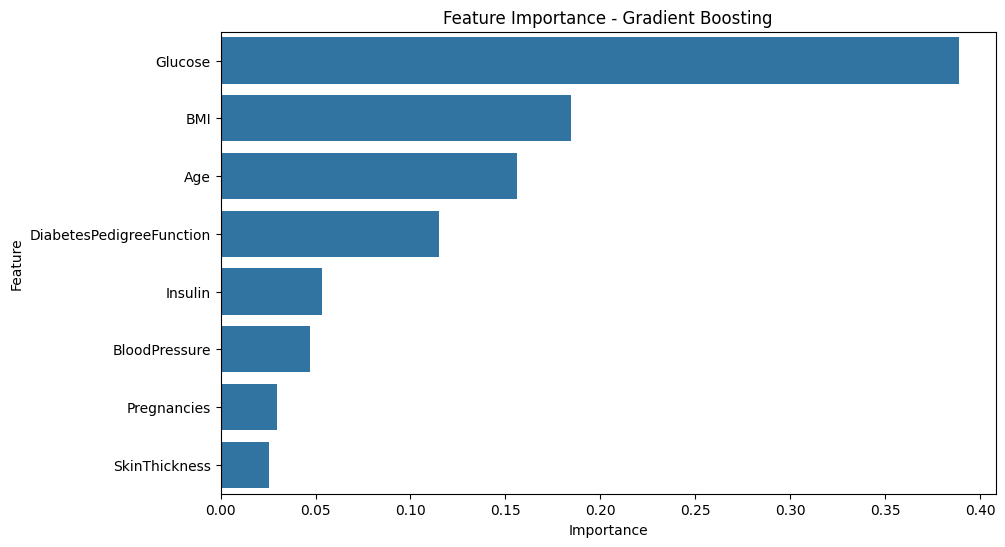


Key Insights for Healthcare Professionals:
                    Feature  Importance
1                   Glucose    0.388556
5                       BMI    0.184717
7                       Age    0.156198
6  DiabetesPedigreeFunction    0.115263
4                   Insulin    0.053266


In [10]:
# Step 7: Insights for Healthcare Professionals
print("\n=== STEP 7: Insights ===")
# Feature Importance from Gradient Boosting
feature_importance = gb_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Gradient Boosting')
plt.show()

print("\nKey Insights for Healthcare Professionals:")
print(importance_df.head())

In [11]:
# Step 8: Conclusion
print("\n=== STEP 8: Conclusion ===")
print("This model can help predict the likelihood of diabetes based on medical data. "
      "Key features influencing the prediction include (based on model feature importance). "
      "The model achieves an AUC-ROC score of ~", roc_auc_gb, "for Gradient Boosting.")


=== STEP 8: Conclusion ===
This model can help predict the likelihood of diabetes based on medical data. Key features influencing the prediction include (based on model feature importance). The model achieves an AUC-ROC score of ~ 0.8095500459136823 for Gradient Boosting.
